In [61]:
import pandas as pd
from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot # for a qqplot
import matplotlib.pyplot as plt # for a qqplot
import seaborn as sns
import numpy as np
import pylab 

In [62]:
df = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [63]:
df.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [64]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [65]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


Text(0.5, 1.0, 'Calories in Starbucks drink items')

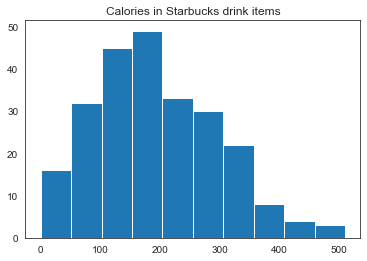

In [66]:
import matplotlib.pyplot as plt
Cals= df["Calories"]
plt.hist(Cals)
plt.title("Calories in Starbucks drink items")

Text(0, 0.5, 'Count')

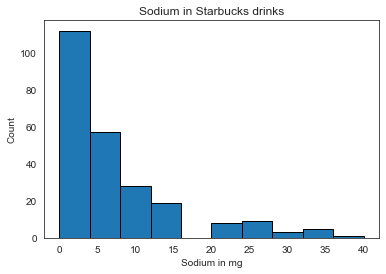

In [67]:
sod= df[" Sodium (mg)"]
plt.hist(sod, bins= 10, edgecolor="black")
plt.title("Sodium in Starbucks drinks")
plt.xlabel("Sodium in mg")
plt.ylabel("Count")

((array([-2.76339822, -2.46025022, -2.28802553, -2.16499522, -2.06799953,
         -1.98727361, -1.9177391 , -1.85640314, -1.80134745, -1.75126571,
         -1.70522662, -1.66254183, -1.62268761, -1.58525584, -1.54992202,
         -1.5164237 , -1.48454548, -1.4541083 , -1.42496161, -1.39697757,
         -1.37004667, -1.34407434, -1.3189783 , -1.29468655, -1.27113564,
         -1.2482694 , -1.22603785, -1.20439628, -1.18330456, -1.16272651,
         -1.14262939, -1.12298347, -1.10376168, -1.08493928, -1.06649361,
         -1.04840385, -1.03065081, -1.01321681, -0.99608544, -0.97924154,
         -0.96267098, -0.94636062, -0.93029822, -0.91447232, -0.89887221,
         -0.88348784, -0.86830979, -0.85332918, -0.83853768, -0.82392739,
         -0.80949091, -0.79522119, -0.78111159, -0.76715581, -0.75334787,
         -0.7396821 , -0.72615308, -0.71275569, -0.69948503, -0.68633643,
         -0.67330543, -0.66038778, -0.64757939, -0.63487638, -0.62227499,
         -0.60977166, -0.59736293, -0.

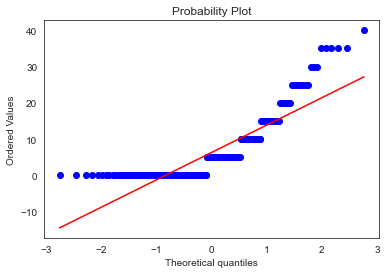

In [68]:
probplot(sod, dist="norm", plot=pylab)

array([[<AxesSubplot:title={'center':'Calories'}>]], dtype=object)

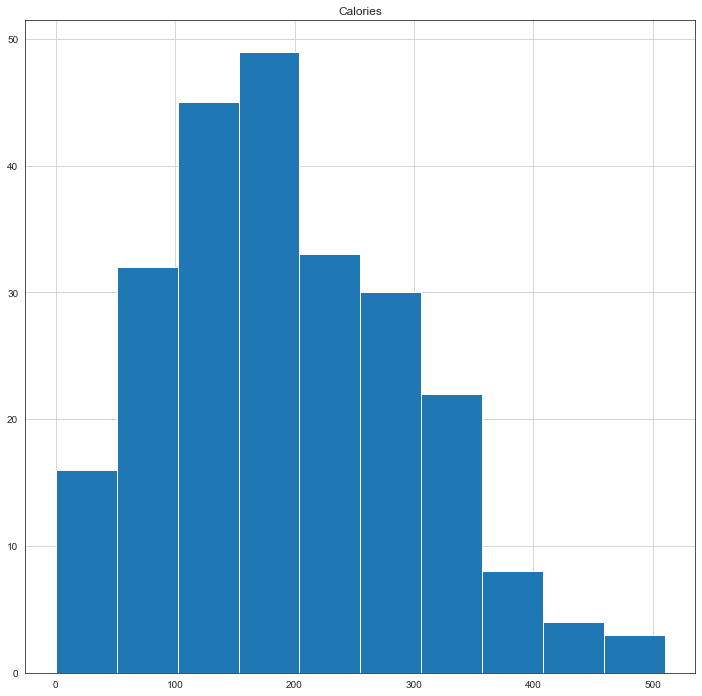

In [69]:
df.hist(column= "Calories", figsize= (12,12))

Text(0.5, 1.0, 'Calories histogram')

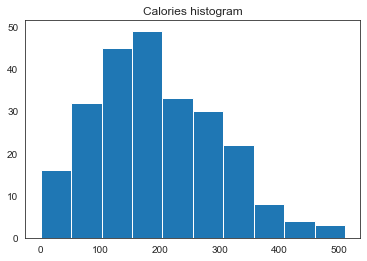

In [70]:
calories = df.Calories
sns.set_style("white")
plt.hist(calories)
plt.title("Calories histogram")

Text(0.5, 1.0, 'Sugar histogram')

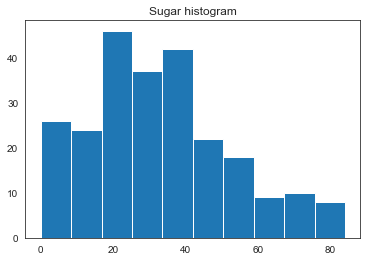

In [71]:
sugar = df[" Sugars (g)"]
plt.hist(sugar)
plt.title("Sugar histogram")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:1668: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


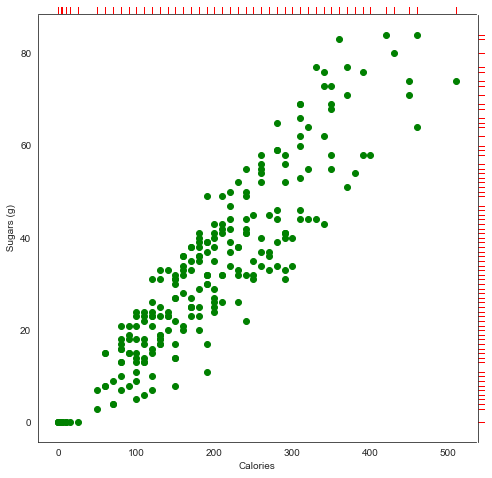

In [72]:
x = calories
y = sugar
grid = sns.JointGrid(x, y, height=8, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=2, color="r")

Text(0, 0.5, '')

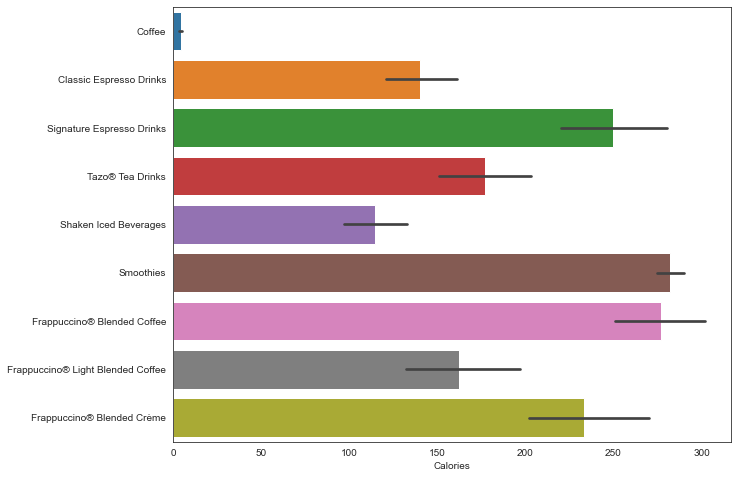

In [73]:
plt.figure(figsize=(10,8))
bar_cal = sns.barplot(x="Calories", y="Beverage_category", data=df)
plt.ylabel("")

Text(0, 0.5, '')

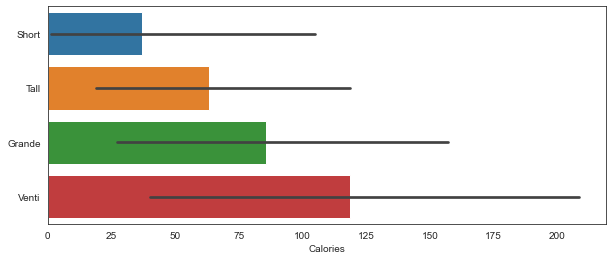

In [74]:
plt.figure(figsize=(10,4))
sizes = df[(df.Beverage_prep == 'Short') | (df.Beverage_prep == 'Venti') | (df.Beverage_prep == 'Grande') | (df.Beverage_prep == 'Tall')]
bar_sizes = sns.barplot(x="Calories", y="Beverage_prep", data=sizes)
plt.ylabel("")

Text(0, 0.5, '')

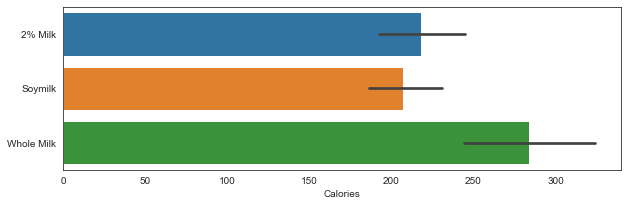

In [75]:
plt.figure(figsize=(10,3))
milk = df[(df.Beverage_prep.str.contains('milk')) | (df.Beverage_prep.str.contains('Milk')) & ~((df.Beverage_prep.str.contains('Short')) | (df.Beverage_prep.str.contains('Grande')) | (df.Beverage_prep.str.contains('Venti')) | (df.Beverage_prep.str.contains('Tall')))]
bar_milk = sns.barplot(x="Calories", y="Beverage_prep", data=milk)
plt.ylabel("")